In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Delta fct

In [2]:
def delta(y, x, dy = 1., dx = 0.) :
    """    
    y : int, float or ndarray of size 1
    x : ndarray
    
    return dy if x = y and dx otherwise
    """
    return np.where(x == y, dy, dx)

In [24]:
x = np.linspace(0, 1, 100)

In [25]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

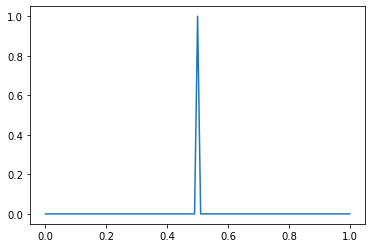

In [5]:
plt.plot(x, delta(0.5, x))
plt.show()

# Solveur

In [6]:
import sys
sys.path.insert(1, '../')

from solvers.Solver import Solver

In [7]:
params_solver = {'equation': 'Poisson', 
                 'domain': [0., 1.], 
                 'D': 1., 
                 'nx': 101, 
                 'source term' : lambda x : delta(0.5, x)}

In [8]:
Dmin, Dmax = 0.1, 10
D_list = np.linspace(Dmin, Dmax, 1000)

U_sols = []
solver = Solver(params={'solver': params_solver})
for d in D_list:
    solver.change_D(new_D=d)
    U_sols.append(solver.solve())

U_sols = np.stack(U_sols)

In [9]:
U_sols.shape

(1000, 101)

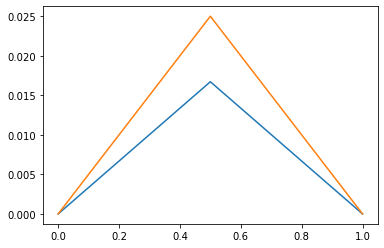

In [20]:
#plt.plot(solver.x, solver.fx)
plt.plot(solver.x, U_sols[5, :])
plt.plot(solver.x, U_sols[0, :])
plt.show()

In [21]:
U_sols[5, :]

array([0.        , 0.00033434, 0.00066867, 0.00100301, 0.00133735,
       0.00167169, 0.00200602, 0.00234036, 0.0026747 , 0.00300904,
       0.00334337, 0.00367771, 0.00401205, 0.00434639, 0.00468072,
       0.00501506, 0.0053494 , 0.00568373, 0.00601807, 0.00635241,
       0.00668675, 0.00702108, 0.00735542, 0.00768976, 0.0080241 ,
       0.00835843, 0.00869277, 0.00902711, 0.00936145, 0.00969578,
       0.01003012, 0.01036446, 0.0106988 , 0.01103313, 0.01136747,
       0.01170181, 0.01203614, 0.01237048, 0.01270482, 0.01303916,
       0.01337349, 0.01370783, 0.01404217, 0.01437651, 0.01471084,
       0.01504518, 0.01537952, 0.01571386, 0.01604819, 0.01638253,
       0.01671687, 0.01638253, 0.01604819, 0.01571386, 0.01537952,
       0.01504518, 0.01471084, 0.01437651, 0.01404217, 0.01370783,
       0.01337349, 0.01303916, 0.01270482, 0.01237048, 0.01203614,
       0.01170181, 0.01136747, 0.01103313, 0.0106988 , 0.01036446,
       0.01003012, 0.00969578, 0.00936145, 0.00902711, 0.00869